# 3.1

In [1]:
import scipy.io as scipy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.linalg as lg
from eval_basis import *
from func_gauss import *
from func_hat import *
from gauss_basis import *
from hat_basis import *

In [2]:


# Least-Squared Error FIT
#  Find the linear combination of basis functions which best model the data.
#
#  Inputs:
#  
#  x - Vector with observation locations in 1D. (indep. variable)
#  t - Vector with observations in 1D. (dep. variable)
#  params - Parameters for the basis functions to be used in func, e.g. as
#    produced by gauss_basis.
#  func - Function handle which evaluates a basis function with parameters
#    given by the columns of params and at the specified locations. e.g. 
#    @gauss_basis, or @hat_basis.
#    For example, the first basis function at x = 2 is func(2, params(:,1)).
#  mu - Scalar representing the standard deviation of the prior Gaussian on
#    the model parameters.
#
#  Outputs:
#  w - Coefficients used to generate a linear combination of the basis 
#    functions which is the maximum likelihood learned model.

def lsefit(x, t, params, func, mu): 
    design_matrix = better_eval_basis(params = params,
                                      func = func,
                                      xeval = x)
    
    w_hat = lg.inv(np.dot(np.transpose(design_matrix), design_matrix) + 
                   np.identity(design_matrix.shape[1])*(1/mu**2))
    w = np.dot(w_hat, np.dot(np.transpose(design_matrix), t))
    return w
    
    

In [3]:
lab_4_dat = scipy.loadmat('/Users/wyattmadden/Documents/school/' + 
                           'MSU/2020/spring/m508/lab_info/lab_4/simple.mat',
                           squeeze_me = True)

x = lab_4_dat['x']
t = lab_4_dat['t']

data_orig = {'x': x,
          't': t}

data_orig = pd.DataFrame(data_orig)

# 3.2

In [4]:

#function to automate fitting process
def df_of_preds(x, t, basis, func, mu, M, at):
    fits = lsefit(x = x,
                  t = t,
                  params = basis(0, 2*np.pi, M),
                  func = func, 
                  mu = mu)
    preds_df = {'fits': np.dot(fits, 
                                  np.transpose(better_eval_basis(basis(0, 
                                                          2*np.pi, 
                                                          M), 
                                                                 func, 
                                                                 at))),
                'x': at}
    preds_df = pd.DataFrame(preds_df)
    return preds_df

#function to automate plotting
def plot_preds_and_data(preds, data, title):
    sns.lineplot(x = "x", y = "fits", data = preds)
    sns.scatterplot(x = "x", y = "t", data = data).set(title = title)
    
    
    

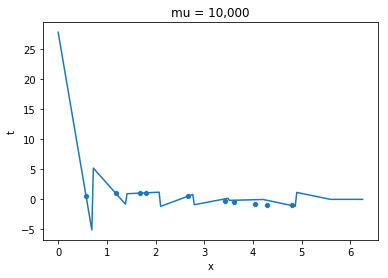

In [21]:
zero_to_two_pi = np.arange(0, 2*np.pi, np.pi/100)

fits = df_of_preds(x = x, t = t, basis = hat_basis, 
                   func = func_hat, mu = 10**5, M = len(x),
                   at = zero_to_two_pi)

plot_preds_and_data(fits, data_orig, "mu = 10,000")

The fit of the hat basis function with mu of 10,000 is not a good approximation of the data. It is too responsive to subsequent data points, especially on the lower end of the x space. 

# 3.3

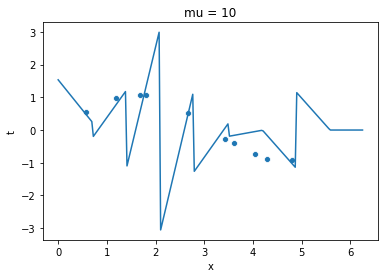

In [22]:
fits = df_of_preds(x, t, hat_basis, func_hat, 10, len(x),
                  at = zero_to_two_pi)
plot_preds_and_data(fits, data_orig, "mu = 10")

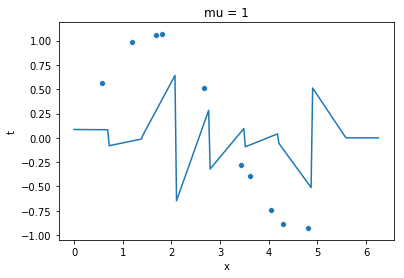

In [23]:
fits = df_of_preds(x, t, hat_basis, func_hat, 1, len(x),
                  at = zero_to_two_pi)
plot_preds_and_data(fits, data_orig, "mu = 1")

# 3.4

For higher mu values, the fit appears to be more determined by the data, while the overall pattern of the fit is not changing across mu values. For example, for mu = 10,000, the fit is overlaid across every data point, indicating a likely overfit. For mu = 1, the fit is closer to a flat line, and does not pick up on the sigmoidal shape of the data. 

# 3.5

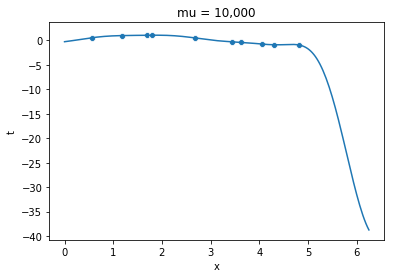

In [24]:
fits = df_of_preds(x, t, gauss_basis, func_gauss, 10**5, len(x),
                  at = zero_to_two_pi)
plot_preds_and_data(fits, data_orig, "mu = 10,000")

# 3.6

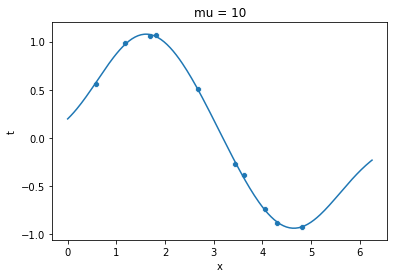

In [25]:
fits = df_of_preds(x, t, gauss_basis, func_gauss, 10, len(x),
                  at = zero_to_two_pi)
plot_preds_and_data(fits, data_orig, "mu = 10")

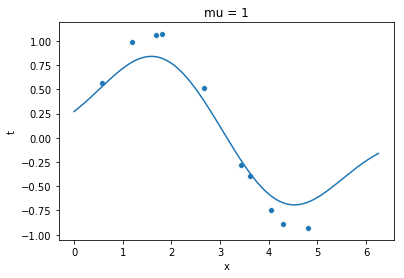

In [26]:
fits = df_of_preds(x, t, gauss_basis, func_gauss, 1, len(x),
                  at = zero_to_two_pi)
plot_preds_and_data(fits, data_orig, "mu = 1")

# 3.7

Mu can be interpretted fairly similarly as in the hat basis case. For mu = 10,000, the fit is extremely responsive to the data, and responds chaotically outside the range of the observed data. For mu = 1, the fit does not appear to be responsive enough. Mu = 10 is just right. The main difference between the gaussian basis and the hat basis, is the hat basis results in a much choppier fit. 

# 3.8

[Text(0.5,1,'Sq Error, Mu 1-100')]

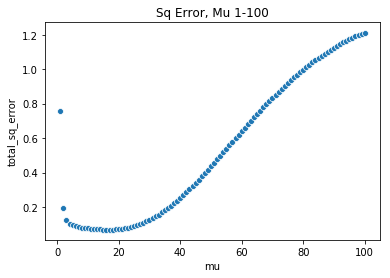

In [12]:
lab_4_test = scipy.loadmat('/Users/wyattmadden/Documents/school/' + 
                           'MSU/2020/spring/m508/lab_info/lab_4/test.mat',
                           squeeze_me = True)

x_test = lab_4_test['test_x']
t_test = lab_4_test['test_t']

data_test = {'x': x_test,
             't': t_test}

data_test = pd.DataFrame(data_test)
sq_errors = np.empty(100)

for i in range(1, 101):
    fits = df_of_preds(x, t, gauss_basis, func_gauss, i, 10,
                  at = x_test)
    sq_errors[i-1] = np.sum((fits['fits'] - t_test)**2)


sq_errors_and_mus = {'mu': range(1, 101),
                    'total_sq_error': sq_errors}
sq_errors_and_mus = pd.DataFrame(sq_errors_and_mus)

sns.scatterplot(x = "mu", 
                y = "total_sq_error", 
                data = sq_errors_and_mus).set(title = "Sq Error, Mu 1-100")

# 3.9

In [34]:
sq_errors_and_mus["mu"][np.argmin(sq_errors)]

16

According the the above calculations, mu of 16 (for an integer value) performs best on the data. This is because a mu of 16 results in the lowest test error, ie. the best tradeoff between over and under fitting. 

# 3.10

[Text(0.5,1,'Sq Error, M 1-100')]

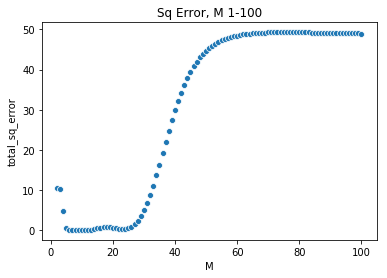

In [19]:
m_sq_errors = np.empty(99)

for i in range(2, 101):
    fits = df_of_preds(x, t, gauss_basis, func_gauss, 13, i,
                  at = x_test)
    m_sq_errors[i-2] = np.sum((fits['fits'] - t_test)**2)


m_sq_errors_and_mus = {'M': range(2, 101),
                    'total_sq_error': m_sq_errors}
m_sq_errors_and_mus = pd.DataFrame(m_sq_errors_and_mus)

sns.scatterplot(x = "M", 
                y = "total_sq_error", 
                data = m_sq_errors_and_mus).set(title = "Sq Error, M 1-100")

In [36]:
m_sq_errors_and_mus["M"][np.argmin(m_sq_errors)]

10

Following similar arguments as in the mu assessement, an M of 10 provides the best tradeoff between over and under fitting. 